In [1]:
import os

In [2]:
os.chdir('../')

In [3]:
import SGD
import numpy as np

%matplotlib notebook
# %matplotlib widget
import matplotlib.pyplot as plt


plt.rcParams['font.size']=16
plt.rcParams['font.family']='dejavu sans'

plt.rcParams['mathtext.fontset']='stix'
plt.rcParams['mathtext.rm']='custom'
plt.rcParams['mathtext.it']='stix:italic'
plt.rcParams['mathtext.bf']='stix:bold'

In [4]:
os.chdir('example')

In [5]:
_=np.loadtxt('eos2020.dat')
T=np.array([[np.log10(i[0])] for i in _[:,] ])

# rdof=np.array([[i[1],i[2]] for i in _[:]])
rdof=np.array([[np.sqrt(i[1]),np.sqrt(i[2])] for i in _[:]])

max_h=max(rdof[:,0])
max_g=max(rdof[:,1])
min_h=min(rdof[:,0])
min_g=min(rdof[:,1])

In [6]:
#the squared error and its derivative
def Q_i(model, i, target):
    return (model.signal[i]-target)**2


def dQds_i(model, i, target):
    return 2*(model.signal[i]-target)



#the model and its derivative wrt w
def sig(x):
    if x>5:
        return 1
    if x<-5:
        return 0
    
    return np.exp(x)/(1+np.exp(x))


# def f(self):
#     i=0
#     y=0
#     while i<6:
#         x=self.input[0]       
#         y+=sig(self.w[i]+self.w[i+1]*x)
#         i+=1
        
#     i+=1
#     self.signal[0]=np.exp(y)*self.w[i]+self.w[i+1]
#     self.signal[1]=np.exp(y)*self.w[i+2]+self.w[i+3]


def f(self):
    x=self.input[0]
    
    self.signal[0]=sig((x+2)*self.w[0])*self.w[1]*7
    self.signal[0]=sig((x+1)*self.w[2])*self.w[3]*5
    self.signal[0]+=sig(x*self.w[4])*self.w[5]*3
    self.signal[0]+=sig((x-1)*self.w[6])*self.w[7]*3
    self.signal[0]+=sig((x-2)*self.w[8])*self.w[9]*3

    self.signal[1]=model.signal[0]

    self.signal[0]+=sig(-(x-3)*self.w[10])*self.w[11]*min_h
    self.signal[1]+=sig(-(x-3)*self.w[12])*self.w[13]*min_g
    

    


def dfdw_i(self, i):
    h=1e-4
    h=np.abs(self.w[i])*h+h
    
    self.w[i]+=-h
    self()    
    f0=self.signal[:]
    
    self.w[i]+=2*h
    self()    
    f1=self.signal[:]
    
    self.w[i]+=-h
    for r in range(2):
        self.dsdw[r]=(f1[r]-f0[r])/(2*h)
        
#declare the instances
model=SGD.modelFunc(f,dfdw_i,[1,2],[1e-2 for i in range(14)])
Q=SGD.lossFunc(Q_i,dQds_i,model)

In [7]:
# strategy=SGD.VanillaSGD(Q ,T,rdof,alpha=1e-2)
# strategy=SGD.RMSpropSGD(Q ,T,rdof,gamma=1-1e-2,epsilon=1e-5,alpha=1e-2)
# strategy=SGD.AdaDeltaSGD(Q ,T,rdof,gamma=0.99,epsilon=1e-5,alpha=1)
# strategy=SGD.AdamSGD(Q ,T,rdof,beta_m=0.9,beta_v=0.999,epsilon=1e-8,alpha=1e-2)
strategy=SGD.AdaMaxSGD(Q ,T,rdof,beta_m=0.9,beta_v=0.999,epsilon=1e-8,alpha=1e-2)
# strategy=SGD.NAdamSGD(Q ,T,rdof,beta_m=0.9,beta_v=0.999,epsilon=1e-8,alpha=1e-2)

In [8]:
sgd=SGD.StochasticGradientDescent(strategy)
sgd.run(abs_tol=1e-3, rel_tol=1e-3, step_break=2500,max_step=10000)

[0.01,
 0.01,
 3.4693441477488847,
 0.6452379906118023,
 1.8894156453672735,
 0.9367171463812841,
 0.36010403371435495,
 0.9121053203851619,
 0.194939255905461,
 0.8241207956346926,
 0.47606441233505337,
 0.7933800504825447,
 0.5171128798112017,
 0.8414453142999425]

<IPython.core.display.Javascript object>


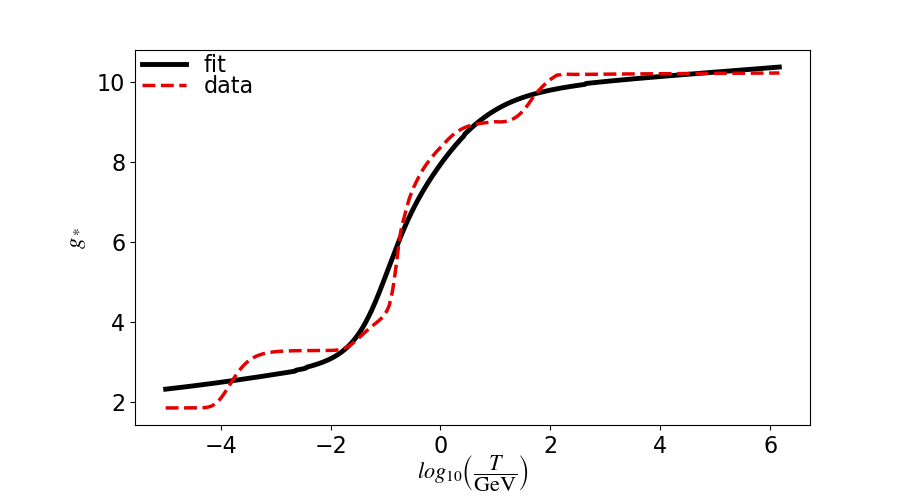

In [9]:
fig=plt.figure(figsize=(9,5))
fig.subplots_adjust(bottom=0.15, left=0.15, top = 0.9, right=0.9,wspace=0.0,hspace=0.0)

sub = fig.add_subplot(1,1,1)

g=[]
for logT in T:
    model.setInput(logT)
    model()    
    g.append(model.signal[1]) 
g=np.array(g)
sub.plot(T,g,linestyle='-',linewidth=3.5,alpha=1,c='xkcd:black',label=r'fit')
sub.plot(T,rdof[:,1],linestyle='--',linewidth=2.5,alpha=1,c='xkcd:red',label=r'data')


sub.legend(bbox_to_anchor=(0.01, 0.99),borderaxespad=0., columnspacing=1,labelspacing=-0.1,
           borderpad=0,ncol=1,loc='upper left' ,framealpha=0)



sub.set_xlabel(r'$log_{10}\left( \dfrac{T}{{\rm GeV}} \right)$')
sub.xaxis.set_label_coords(0.5, -0.075) 
sub.set_ylabel(r'$g_{\rm *}$')
sub.yaxis.set_label_coords(-0.07,0.5) 


fig.show()

<IPython.core.display.Javascript object>


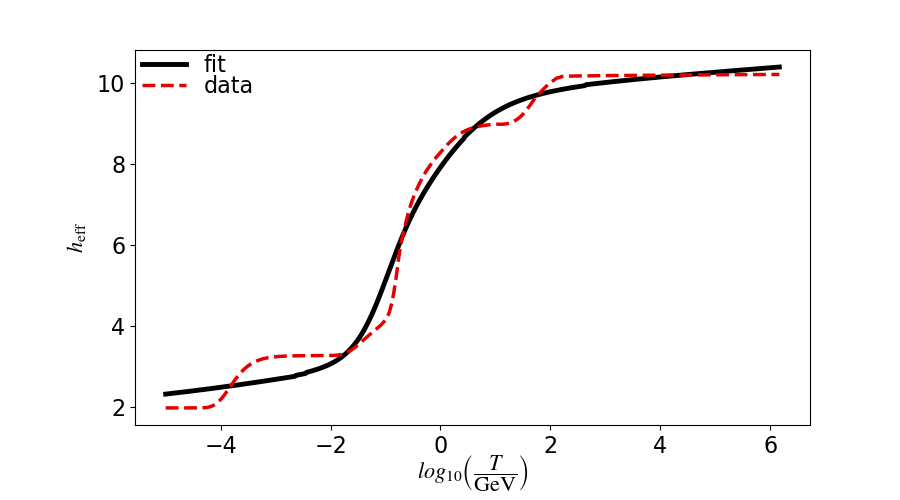

In [10]:
fig=plt.figure(figsize=(9,5))
fig.subplots_adjust(bottom=0.15, left=0.15, top = 0.9, right=0.9,wspace=0.0,hspace=0.0)

sub = fig.add_subplot(1,1,1)

h=[]
for logT in T:
    model.setInput(logT)
    model()    
    h.append(model.signal[0]) 
h=np.array(h)
sub.plot(T,h,linestyle='-',linewidth=3.5,alpha=1,c='xkcd:black',label=r'fit')
sub.plot(T,rdof[:,0],linestyle='--',linewidth=2.5,alpha=1,c='xkcd:red',label=r'data')


sub.legend(bbox_to_anchor=(0.01, 0.99),borderaxespad=0., columnspacing=1,labelspacing=-0.1,
           borderpad=0,ncol=1,loc='upper left' ,framealpha=0)



sub.set_xlabel(r'$log_{10}\left( \dfrac{T}{{\rm GeV}} \right)$')
sub.xaxis.set_label_coords(0.5, -0.075) 
sub.set_ylabel(r'$h_{\rm eff}$')
sub.yaxis.set_label_coords(-0.07,0.5) 


fig.show()

<IPython.core.display.Javascript object>


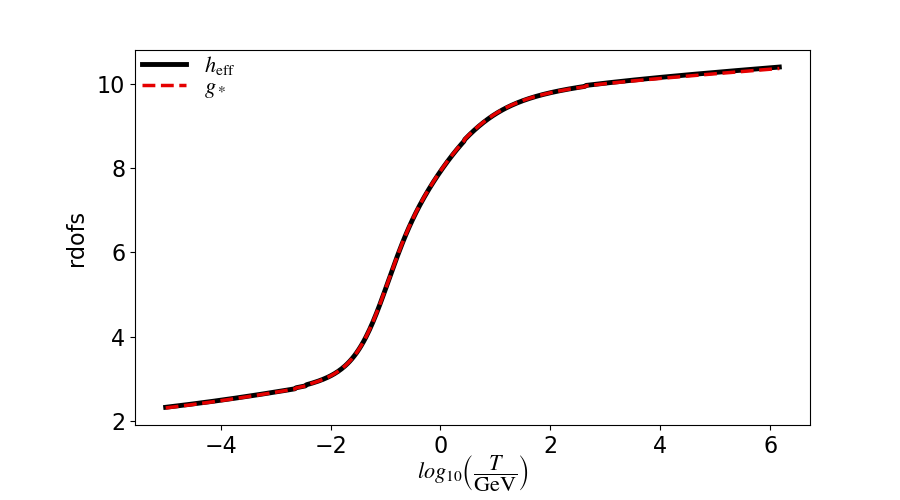

In [11]:
fig=plt.figure(figsize=(9,5))
fig.subplots_adjust(bottom=0.15, left=0.15, top = 0.9, right=0.9,wspace=0.0,hspace=0.0)

sub = fig.add_subplot(1,1,1)

sub.plot(T,h,linestyle='-',linewidth=3.5,alpha=1,c='xkcd:black',label=r'$h_{\rm eff}$')
sub.plot(T,g,linestyle='--',linewidth=2.5,alpha=1,c='xkcd:red',label=r'$g_{\rm *}$')


sub.legend(bbox_to_anchor=(0.01, 0.99),borderaxespad=0., columnspacing=1,labelspacing=-0.1,
           borderpad=0,ncol=1,loc='upper left' ,framealpha=0)



sub.set_xlabel(r'$log_{10}\left( \dfrac{T}{{\rm GeV}} \right)$')
sub.xaxis.set_label_coords(0.5, -0.075) 
sub.set_ylabel(r'rdofs')
sub.yaxis.set_label_coords(-0.07,0.5) 


fig.show()